In [9]:
import os, sys, glob
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
from copy import copy as copy
from collections import defaultdict
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

from parameters import get_parameters

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [44]:
mol = "CF2IBr"
run = "sim_validation"
L_max = 10
sims = ["numerical-100"]

params = get_parameters(run)
params.imgBins = 2*params.NradAzmBins - 1
sim_types = ["numeric", "analytic"]

q_x_lf,q_z_lf = np.meshgrid(
    -1*(np.arange(params.imgBins)-params.NradAzmBins+1)*params.QperPix,
    -1*(np.arange(params.imgBins)-params.NradAzmBins+1)*params.QperPix)
q_x_lf = q_x_lf.astype(np.float32)
q_z_lf = q_z_lf.astype(np.float32)
q_map = np.sqrt(q_x_lf**2 + q_z_lf**2)

anl_old={}
anl_new={}

In [47]:
print(params.simOutputDir)
mol_mod_raw_anl, mol_mod_raw_num = {}, {}
for stype in sim_types:
    for sm in sims:
        if stype == "analytic":
            if len(mol_mod_raw_anl) > 0:
                continue
        else:
            mol_mod_raw_num[sm] = {}
            
        for l in range(0, L_max+1):
            for k in np.arange(-1*l, l+1):
                suffix = "-"+str(l)+".0."+str(k)

                if stype == "numeric":
                    dir_name = os.path.join(params.simOutputDir, sm)
                else:
                    dir_name = os.path.join(params.simOutputDir, "analytic")
                
                fName = os.path.join(
                    dir_name,
                    "{0}_sim_diffraction-{1}_Qmax-{2:.4g}_time-0_LMK{3}.h5".format(
                        mol, stype, q_map[params.imgBins//2,-1], suffix))
                print("FILE", fName)

                with h5py.File(fName, "r") as h5:
                    mol_mod_raw_ = h5["mol_diffraction_raw"][:]/h5["atm_diffraction"][:]
                    q = h5["q"][:]
                    

                if stype == "analytic":
                    mol_mod_raw_anl[(l,0,k)] = copy(mol_mod_raw_)
                    anl_new[(l,0,k)] = copy(mol_mod_raw_)
                    q_new = copy(q)
                else:
                    mol_mod_raw_num[sm][(l,0,k)] = np.conj(copy(mol_mod_raw_))

./output
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-0.0.0.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-1.0.-1.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-1.0.0.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-1.0.1.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.-2.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.-1.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.0.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.1.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.2.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-3.0.-3.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-3.0.-2.h5
FILE ./output/numerical-100/C

FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-10.0.4.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-10.0.5.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-10.0.6.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-10.0.7.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-10.0.8.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-10.0.9.h5
FILE ./output/numerical-100/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-10.0.10.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-0.0.0.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-1.0.-1.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-1.0.0.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-1.0.1.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-anal

FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.-7.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.-6.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.-5.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.-4.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.-3.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.-2.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.-1.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.0.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.1.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.2.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0_LMK-10.0.3.h5
FILE ./output/analytic/CF2IBr_sim_diffraction-analytic_Qmax-20_time-0

In [9]:
anl_old = copy(mol_mod_raw_anl)

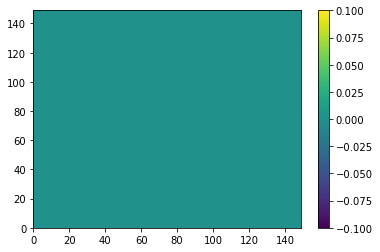

In [44]:
plt.pcolormesh(q_new-q_old)
plt.colorbar()

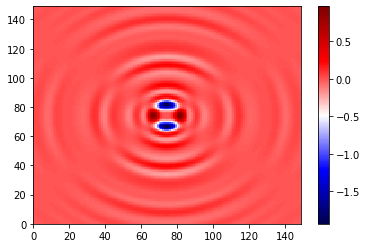

In [48]:
ind = (2,0,0)
#print(list(anl_old.keys()))
#print(anl_old[ind])
#print(anl_new[ind])
plt.pcolormesh(np.real(anl_old[ind]-anl_new[ind]), cmap='seismic')
plt.colorbar()

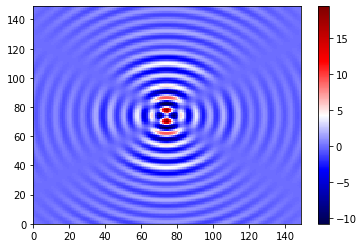

In [46]:
#plt.pcolormesh(np.real(anl_old[ind]), cmap='seismic')
#plt.colorbar()

plt.plot(np.real(anl_old[ind]-anl_new[ind]))

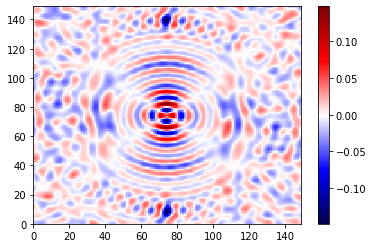

In [39]:
ind = (2,0,0)
#print(list(anl_old.keys()))
#print(anl_old[ind])
#print(anl_new[ind])
plt.pcolormesh(np.real(mol_mod_raw_num[sims[0]][ind]-mol_mod_raw_num[sims[2]][ind]), cmap='seismic')
plt.colorbar()

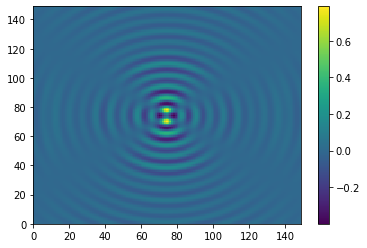

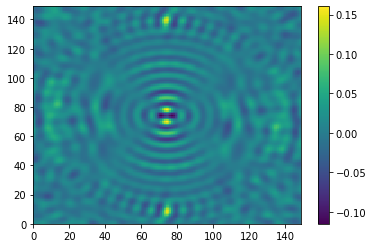

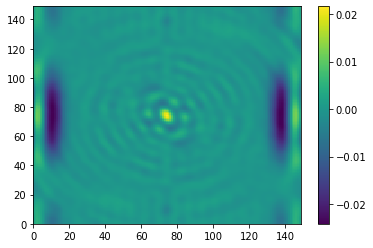

In [55]:
with h5py.File("./output/CF2IBr_sim_diffraction-numeric_Qmax-20_time-0_LMK-2.0.0.h5", "r") as h5:
    test_num = h5["mol_diffraction_raw"][:]/h5["atm_diffraction"][:]

plt.figure()
plt.pcolormesh(np.real(test_num))
plt.colorbar()

plt.figure()
plt.pcolormesh(np.real(test_num-mol_mod_raw_num[sims[0]][(2,0,0)]))
plt.colorbar()

plt.figure()
scl = np.sqrt(np.sum(mol_mod_raw_num[sims[0]][(2,0,0)]**2)/np.sum(anl_new[(2,0,0)]**2))

#plt.pcolormesh(np.real(anl_new[(2,0,0)]/scl-mol_mod_raw_num[sims[0]][(2,0,0)]))
scl = np.sqrt(np.sum(test_num**2)/np.sum(anl_new[(2,0,0)]**2))
plt.pcolormesh(np.real(scl*anl_new[(2,0,0)]-test_num))
plt.colorbar()

In [48]:
compare = {}
mask = np.ones_like(mol_mod_raw_anl[(0,0,0)])
mask[mask.shape[0]//2, mask.shape[1]//2] = 0
q_ = q[mask.shape[0]//2,:]
q_[:mask.shape[0]//2] *= -1
X,Y = np.meshgrid(q_, q_) 
#X,Y = np.meshgrid(
#    np.arange(mol_mod_raw_anl[(0,0,0)].shape[0]),
#    np.arange(mol_mod_raw_anl[(0,0,0)].shape[0]))
print("MASK VALS", mol_mod_raw_num[sm][(0,0,0)][np.invert(mask.astype(bool))], mol_mod_raw_anl[(0,0,0)][np.invert(mask.astype(bool))])
for sm in sims:
    compare[sm] = {}
    scale = np.sum(np.abs(mask*mol_mod_raw_anl[(2,0,0)]))\
        /np.sum(np.abs(mask*mol_mod_raw_num[sm][(2,0,0)]))
    print(sm, mol_mod_raw_num[sm][(2,0,0)].shape, mask.shape)
    print("MASK VALS", mol_mod_raw_num[sm][(2,0,0)][mask.shape[0]//2, mask.shape[1]//2+13], mol_mod_raw_anl[(2,0,0)][mask.shape[0]//2, mask.shape[1]//2+13])
    for lmk in mol_mod_raw_num[sm].keys():
        """
        fig, ax = plt.subplots()
        p = ax.pcolormesh(X, Y, np.real(mol_mod_raw_anl[sm][lmk]))
        fig.colorbar(p, ax=ax)
        fig.savefig("plots/compare/LMK-{}-{}-{}_analytic.png".format(*lmk))
        plt.close()
        fig, ax = plt.subplots()
        p = ax.pcolormesh(X, Y, np.real(mol_mod_raw_num[sm][lmk]))
        fig.colorbar(p, ax=ax)
        fig.savefig("plots/compare/LMK-{}-{}-{}_numerical.png".format(*lmk))
        plt.close()
        """
        
        mol_mod_raw_num[sm][lmk] = scale*mol_mod_raw_num[sm][lmk]
        diff = mol_mod_raw_anl[lmk] - mol_mod_raw_num[sm][lmk]
        rl_diff = np.sqrt(np.sum(np.real(diff)**2))
        im_diff = np.sqrt(np.sum(np.imag(diff)**2))
        compare[sm][lmk] = (copy(rl_diff), copy(im_diff),
            np.sqrt(np.sum(np.real(mol_mod_raw_anl[lmk])**2)),
            np.sqrt(np.sum(np.imag(mol_mod_raw_anl[lmk])**2)))

        #print("{0} {1}: {2:.3g} / {3:.3g} / {4:.3g} || {5:.3g} / {6:.3g} / {7:.3g}".format(sm, lmk,
        #    compare[sm][lmk][2], compare[sm][lmk][0], compare[sm][lmk][0]/compare[sm][lmk][2],
        #    compare[sm][lmk][3], compare[sm][lmk][1], compare[sm][lmk][1]/compare[sm][lmk][3]))

MASK VALS [7.79698999-0.j] [196.63098905+0.j]
numerical-100 (149, 149) (149, 149)
MASK VALS (-0.15999181304503785-0j) (-4.020121070012244+0j)


In [6]:
compare = {}
mask = np.ones_like(mol_mod_raw_anl[(0,0,0)])
mask[mask.shape[0]//2, mask.shape[1]//2] = 0
X,Y = np.meshgrid(
    np.arange(mol_mod_raw_anl[(0,0,0)].shape[0]),
    np.arange(mol_mod_raw_anl[(0,0,0)].shape[0]))
for sm in sims:
    compare[sm] = {}
    scale = np.sum(np.abs(mask*mol_mod_raw_anl[(2,0,0)]))\
        /np.sum(np.abs(mask*mol_mod_raw_num[sm][(2,0,0)]))
    print(sm, mol_mod_raw_num[sm][(2,0,0)].shape, mask.shape)
    print("MASK VALS", mol_mod_raw_num[sm][(2,0,0)][mask.shape[0]//2, mask.shape[1]//2+13], mol_mod_raw_anl[(2,0,0)][mask.shape[0]//2, mask.shape[1]//2+13])
    for lmk in mol_mod_raw_num[sm].keys():
        """
        fig, ax = plt.subplots()
        p = ax.pcolormesh(X, Y, np.real(mol_mod_raw_anl[sm][lmk]))
        fig.colorbar(p, ax=ax)
        fig.savefig("plots/compare/LMK-{}-{}-{}_analytic.png".format(*lmk))
        plt.close()
        fig, ax = plt.subplots()
        p = ax.pcolormesh(X, Y, np.real(mol_mod_raw_num[sm][lmk]))
        fig.colorbar(p, ax=ax)
        fig.savefig("plots/compare/LMK-{}-{}-{}_numerical.png".format(*lmk))
        plt.close()
        """
        
        mol_mod_raw_num[sm][lmk] = scale*mol_mod_raw_num[sm][lmk]
        diff = mol_mod_raw_anl[lmk] - mol_mod_raw_num[sm][lmk]
        rl_diff = np.sqrt(np.sum(np.real(diff)**2))
        im_diff = np.sqrt(np.sum(np.imag(diff)**2))
        compare[sm][lmk] = (copy(rl_diff), copy(im_diff),
            np.sqrt(np.sum(np.real(mol_mod_raw_anl[lmk])**2)),
            np.sqrt(np.sum(np.imag(mol_mod_raw_anl[lmk])**2)))

        #print("{0} {1}: {2:.3g} / {3:.3g} / {4:.3g} || {5:.3g} / {6:.3g} / {7:.3g}".format(sm, lmk,
        #    compare[sm][lmk][2], compare[sm][lmk][0], compare[sm][lmk][0]/compare[sm][lmk][2],
        #    compare[sm][lmk][3], compare[sm][lmk][1], compare[sm][lmk][1]/compare[sm][lmk][3]))

numerical-50 (149, 149) (149, 149)
MASK VALS (-3.982356779341527+0j) (-4.020121070012244+0j)
numerical-100 (149, 149) (149, 149)
MASK VALS (-4.02710633852123+0j) (-4.020121070012244+0j)


In [26]:
compare = {}
mask = np.ones_like(mol_mod_raw_anl[sims[0]][(0,0,0)])
mask[mask.shape[0]//2, mask.shape[1]//2] = 0
X,Y = np.meshgrid(q[mask.shape[0]//2,:], q[mask.shape[0]//2,:]) 
#    np.arange(mol_mod_raw_anl[sims[0]][(0,0,0)].shape[0]),
#    np.arange(mol_mod_raw_anl[sims[0]][(0,0,0)].shape[0]))
for sm in sims:
    compare[sm] = {}
    scale = np.sum(np.abs(mask*mol_mod_raw_anl[sm][(2,0,0)]))\
        /np.sum(np.abs(mask*mol_mod_raw_num[sm][(2,0,0)]))
    print(sm, mol_mod_raw_num[sm][(2,0,0)].shape, mask.shape)
    print("MASK VALS", mol_mod_raw_num[sm][(2,0,0)][np.invert(mask.astype(bool))], mol_mod_raw_anl[sm][(2,0,0)][np.invert(mask.astype(bool))])
    for lmk in mol_mod_raw_num[sm].keys():
        """
        fig, ax = plt.subplots()
        p = ax.pcolormesh(X, Y, np.real(mol_mod_raw_anl[sm][lmk]))
        fig.colorbar(p, ax=ax)
        fig.savefig("plots/compare/LMK-{}-{}-{}_analytic.png".format(*lmk))
        plt.close()
        fig, ax = plt.subplots()
        p = ax.pcolormesh(X, Y, np.real(mol_mod_raw_num[sm][lmk]))
        fig.colorbar(p, ax=ax)
        fig.savefig("plots/compare/LMK-{}-{}-{}_numerical.png".format(*lmk))
        plt.close()
        """
        
        mol_mod_raw_num[sm][lmk] = scale*mol_mod_raw_num[sm][lmk]
        diff = mol_mod_raw_anl[sm][lmk] - mol_mod_raw_num[sm][lmk]
        rl_diff = np.sqrt(np.sum(np.real(diff)**2))
        im_diff = np.sqrt(np.sum(np.imag(diff)**2))
        compare[sm][lmk] = (copy(rl_diff), copy(im_diff),
            np.sqrt(np.sum(np.real(mol_mod_raw_anl[sm][lmk])**2)),
            np.sqrt(np.sum(np.imag(mol_mod_raw_anl[sm][lmk])**2)))

        #print("{0} {1}: {2:.3g} / {3:.3g} / {4:.3g} || {5:.3g} / {6:.3g} / {7:.3g}".format(sm, lmk,
        #    compare[sm][lmk][2], compare[sm][lmk][0], compare[sm][lmk][0]/compare[sm][lmk][2],
        #    compare[sm][lmk][3], compare[sm][lmk][1], compare[sm][lmk][1]/compare[sm][lmk][3]))

KeyError: 'numerical-100'

/cds/sw/ds/ana/conda2/inst/envs/ps-4.2.0/lib/python3.7/site-packages/ipykernel/__main__.py:71: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.2.0/lib/python3.7/site-packages/ipykernel/__main__.py:93: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.2.0/lib/python3.7/site-packages/ipykernel/__main__.py:110: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C 

scale 100
scale 1
scale 1
scale 10
scale 100
scale 1


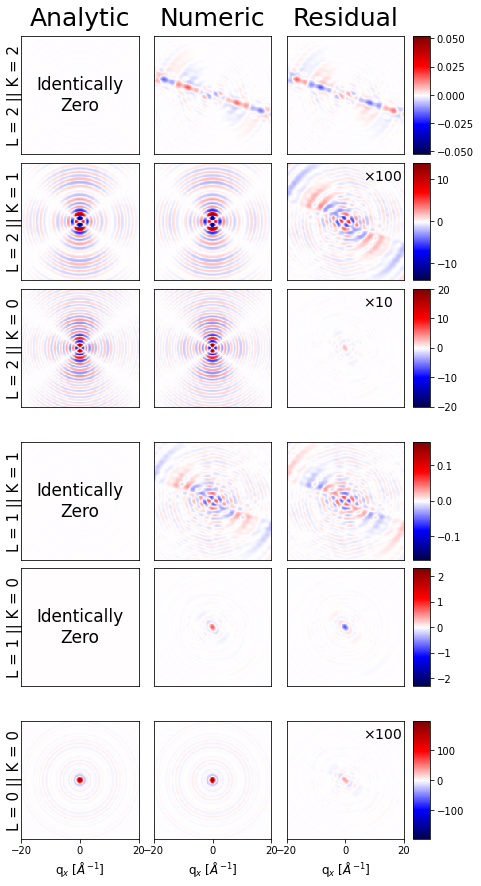

In [49]:
ptype = "real"
sm = sims[-1]
axs = []
L = 2

top_pad = 0.04
bot_pad = 0.05
l_pad = 0.04
vert_pad = 0.01
vert_dim = (1 - (bot_pad + top_pad + 2*l_pad + 3*vert_pad))/6

horz_pad = 0.03
left_pad = 0.07
right_pad = 0.17
horz_dim = (1 - (left_pad + right_pad + 2*horz_pad))/3

fig_ratio = vert_dim/horz_dim
fig = plt.figure(figsize=(7,7/fig_ratio))


vert_anch = []
count = 0
m_count = 0
for l in range(L+1):
    for m in range(0, l+1):
        m_count += int(m != 0)
        if l == 0:
            vert_anch.append(bot_pad)
        else:
            vert_anch.append(bot_pad + l_pad*l + m_count*vert_pad + vert_dim*count)
        count += 1
            
horz_anch = []
for cc in range(3):
    horz_anch.append(left_pad + (horz_dim + horz_pad)*cc)

caxs = []
rr = 0
for l in range(L+1):
    for m in range(0, l+1):
        axs.append([])
        for cc in range(3):
            axs[rr].append(fig.add_axes((horz_anch[cc], vert_anch[rr], horz_dim, vert_dim)))
        caxs.append(fig.add_axes((horz_anch[cc]+horz_dim+0.1*right_pad, vert_anch[rr], right_pad*0.2, vert_dim)))
        rr += 1

def plot_zero(ax):
    ax.text(0.5, 0.5, "Identically\nZero", transform=ax.transAxes,
           horizontalalignment='center', verticalalignment='center', fontsize=17)


scale = 1
#np.sum(np.abs(mask*mol_mod_raw_anl[sm][(2,0,0)]))\
#    /np.sum(np.abs(mask*mol_mod_raw_num[sm][(2,0,0)]))
rr = 0
for l in range(L+1):
    for k in range(0, l+1):
        lmk = (l,0,k)
        rng = None
        for cc in range(3):
            if cc == 0:
                if ptype == "real":
                    rng = np.max([np.abs(np.amin(np.real(mol_mod_raw_anl[lmk]))), np.amax(np.real(mol_mod_raw_anl[lmk])),
                             np.abs(np.amin(np.real(mol_mod_raw_num[sm][lmk]))), np.amax(np.real(mol_mod_raw_num[sm][lmk]))])
                    if np.sum(np.real(mol_mod_raw_anl[lmk])**2) < 1e-25:
                        rng *= 3
                        
                    if rng < 1e-14:
                        rng = 1e-4
                    axs[rr][cc].pcolormesh(X, Y, np.real(mol_mod_raw_anl[lmk]),
                            cmap='seismic', vmax=rng, vmin=-1*rng)
                    if np.sum(np.real(mol_mod_raw_anl[lmk])**2) < 1e-25:
                        plot_zero(axs[rr][cc])
                elif ptype == "imag":
                    rng = np.max([np.abs(np.amin(np.imag(mol_mod_raw_anl[lmk]))), np.amax(np.imag(mol_mod_raw_anl[lmk])),
                             np.abs(np.amin(np.imag(mol_mod_raw_num[sm][lmk]))), np.amax(np.imag(mol_mod_raw_num[sm][lmk]))])
                    if rng < 1e-14:
                        rng = 1e-1
                    if l==0:
                        print("RANGE", rng)
                    axs[rr][cc].pcolormesh(X, Y, np.imag(mol_mod_raw_anl[lmk]),
                            cmap='seismic', vmax=rng, vmin=-1*rng)
                    if np.sum(np.imag(mol_mod_raw_anl[lmk])**2) < 1e-25:
                        plot_zero(axs[rr][cc])
                plt.text(-0.05, 0.5, "L = "+str(l)+" || K = "+str(k), horizontalalignment='center', fontsize=15,
                        verticalalignment='center', transform=axs[rr][cc].transAxes, rotation=90)
            elif cc == 1:
                if ptype == "real":
                    num_image = scale*np.real(mol_mod_raw_num[sm][lmk])
                elif ptype == "imag":
                    num_image = scale*np.imag(mol_mod_raw_num[sm][lmk])
                axs[rr][cc].pcolormesh(X, Y, num_image,
                        cmap='seismic', vmax=rng, vmin=-1*rng)
                num_mag = np.sqrt(np.sum(num_image**2))
                if np.sum(num_image**2) < 1e-25:
                    plot_zero(axs[rr][cc])
            else:
                if ptype == "real":
                    residual = np.real(mol_mod_raw_anl[lmk] - scale*mol_mod_raw_num[sm][lmk])
                elif ptype == "imag":
                    residual = np.imag(mol_mod_raw_anl[lmk] - scale*mol_mod_raw_num[sm][lmk])
                if np.sum(residual**2):
                    res_scale = int(num_mag/np.sqrt(np.sum(residual**2)))
                    res_scale = 10**(len(str(res_scale))-1)
                    print("scale", res_scale)
                    if res_scale >= 10:
                        axs[rr][cc].text(0.65, 0.85, r'$\times {}$'.format(res_scale),
                                    transform=axs[rr][cc].transAxes, fontsize=14)
                im = axs[rr][cc].pcolormesh(X, Y, res_scale*residual,
                        cmap='seismic', vmax=rng, vmin=-1*rng)
                if np.sum(residual**2) < 1e-25:
                    plot_zero(axs[rr][cc])
                
                fig.colorbar(im, cax=caxs[rr])
            axs[rr][cc].xaxis.set_visible(False)
            axs[rr][cc].yaxis.set_visible(False)
        
        rr += 1
plt.text(0.5, 1.15, 'Analytic', horizontalalignment='center', fontsize=25,
     verticalalignment='center', transform=axs[-1][0].transAxes)
plt.text(0.5, 1.15, 'Numeric', horizontalalignment='center', fontsize=25,
     verticalalignment='center', transform=axs[-1][1].transAxes)
plt.text(0.5, 1.15, 'Residual', horizontalalignment='center', fontsize=25,
     verticalalignment='center', transform=axs[-1][2].transAxes)

for i in range(3):
    axs[0][i].xaxis.set_visible(True)
    axs[0][i].set_xlabel("q$_x$ $[\AA^{-1}]$", fontsize=12)
    axs[0][i].tick_params(axis='x', labelsize=10)

fig.savefig("plots/compare_sims_"+ptype+".png")

In [50]:
labels = []
diff_all, diff_k0 = [], []
for lmk in mol_mod_raw_num.keys():
    if lmk[0] == 0:
        continue
    labels.append(str(lmk))
    diff_all.append(compare[lmk][0])
    if lmk[2] == 0:
        diff_k0.append(compare[lmk][0])

fig, ax = plt.subplots()
ax.plot(np.arange(len(diff_all)), diff_all)
ax.set_xticks(np.arange(len(diff_all)))
ax.set_xticklabels(labels, rotation='vertical')
plt.tight_layout()
fig.savefig("plots/compare/differences_real.png")
plt.close()

fig, ax = plt.subplots()
ax.plot(np.arange(len(diff_k0)), diff_k0)
ax.set_xticks(np.arange(len(diff_k0)))
fig.savefig("plots/compare/differences_k0.png")
plt.close()


KeyError: 0

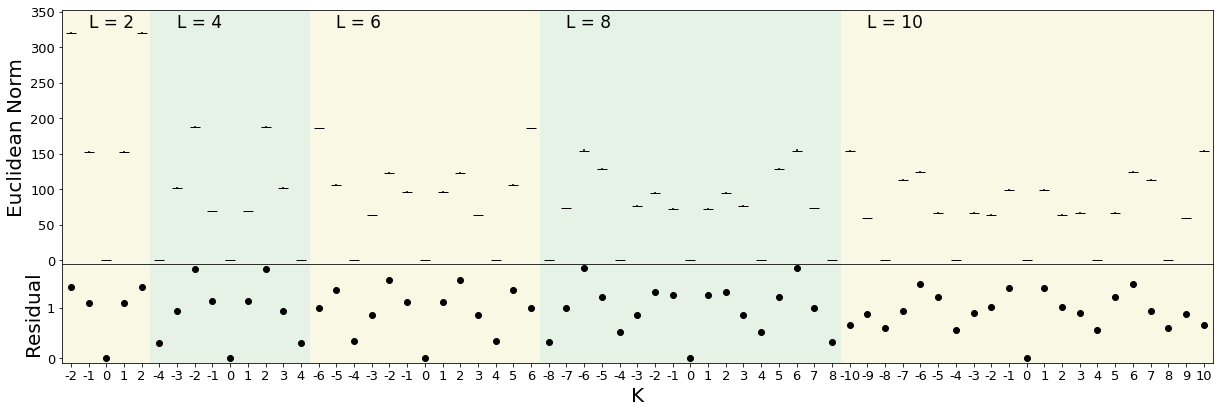

In [105]:
#fig, ax = plt.subplots(2, 1, figsize=(20, 7))
ptype="imag"
colors = ['k', 'k']
label_size = 20
tick_size = 13
leg_labels = ["100 Steps"]
fig = plt.figure(figsize=(17, 5.5))
ax = []
ax.append(fig.add_axes((0.05, 0.35, 0.94, 0.64)))
ax.append(fig.add_axes((0.05, 0.1, 0.94, 0.25)))
max_norm = 0

for ism, sm in enumerate(sims):
    labels = []
    norm = []
    err = []
    for lmk in mol_mod_raw_num[sm].keys():
        prev_norm_size = len(norm)
        if lmk[0]%2 != 0 or lmk[0] == 0:
            continue
        labels.append(str(lmk[-1]))
        if ptype == "real":
            norm.append(compare[sm][lmk][2])
            err.append(compare[sm][lmk][0])
        elif ptype == "imag":
            norm.append(compare[sm][lmk][3])
            err.append(compare[sm][lmk][1])
    if ism == len(sims) - 1:
        ax[0].errorbar(np.arange(len(norm)), norm, yerr=err,
              fmt='_', markersize=10, color='k', ecolor='k')
    ax[1].plot(np.arange(len(norm)), err, 'o', color=colors[ism], label=leg_labels[ism])
    max_norm = np.amax(norm+[max_norm])
    
        
yL0, yH0 = -5, 1.1*max_norm
yL1, yH1 = 1e-1, max_norm*1.05

ax[0].set_xlim(-0.5, len(norm)-0.5)
ax[1].set_xlim(-0.5, len(norm)-0.5)
ax[1].set_xlabel("K", fontsize=label_size)
ax[0].set_ylim(yL0, yH0)
#ax[1].set_ylim(yL1, yH1)
ax[0].set_ylabel("Euclidean Norm", fontsize=label_size)
ax[1].set_ylabel("Residual", fontsize=label_size)
#ax[1].set_yscale('log')


ax[1].set_xticks(np.arange(len(norm)))
ax[1].set_xticklabels(labels, fontsize=tick_size)
ax[0].tick_params(axis='x', labelsize=tick_size)
ax[1].tick_params(axis='x', labelsize=tick_size)
ax[0].tick_params(axis='y', labelsize=tick_size)
ax[1].tick_params(axis='y', labelsize=tick_size)

itr = 0
start = 0
for l in np.arange(L_max+1):
    if l % 2 != 0 or l == 0:
        continue
    
    if itr%2 == 0:
        clr = 'y'
    else:
        clr = 'g'
    rect = plt.Rectangle((start-0.5, yL0), 2*l+1, yH0-yL0, facecolor=clr, alpha=0.1)
    ax[0].add_patch(rect)
    rect = plt.Rectangle((start-0.5, -1), 2*l+1, yH1-yL1, facecolor=clr, alpha=0.1)
    ax[1].add_patch(rect)
    
    ax[0].text(start+1, 0.95*yH0, "L = {}".format(l), #transform=ax.transAxes,
           horizontalalignment='left', verticalalignment='center', fontsize=17)
    start += 2*l + 1
    itr += 1

#fig.legend(loc='upper right', fontsize='xx-large')
fig.savefig("plots/norm_res_{}.png".format(ptype))


[2.285614553673415e-14, 0.0, 2.285614553673415e-14, 5.4401607184950656e-14, 7.843328408971794e-14, 2.3776475354347645e-14, 0.0, 3.387126705146901e-14, 7.033381911033208e-14, 5.3405231608894845e-14, 9.97760452397293e-14, 2.6376147671917574e-14, 4.2145455092171127e-14, 8.676996363421293e-14, 2.4681825956223282e-14, 0.0, 3.151816111491475e-14, 8.85712284749416e-14, 4.5028117116865556e-14, 2.6955486378391728e-14, 9.941094500828419e-14, 8.079677140665572e-15, 8.89794078367547e-14, 1.0783878013144225e-13, 2.3435647424189237e-14, 2.9956472152344146e-14, 6.718045477617215e-14, 4.3878538361985547e-14, 0.0, 4.53985347903705e-14, 6.308361201048019e-14, 2.912764232271293e-14, 2.2535620741625045e-14, 9.548831342167715e-14, 8.996236905898882e-14, 8.411630557464958e-15, 1.0886919021466916e-13, 4.39529851833594e-14, 4.094228357708395e-14, 6.837687109672396e-14, 7.112110309403081e-14, 2.5298725382955628e-14, 4.3758975028689466e-14, 5.886713970432201e-14, 5.144871516924122e-14, 0.0, 5.035942878533934e-1

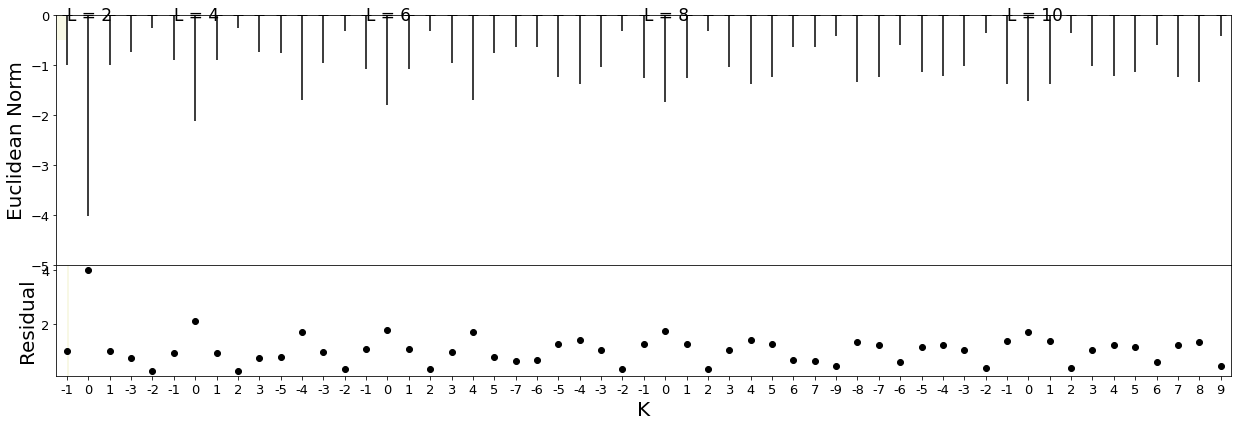

In [103]:
#fig, ax = plt.subplots(2, 1, figsize=(20, 7))
ptype = "real"
colors = ['k', 'k']
leg_labels = ["100 Steps"]
fig = plt.figure(figsize=(17, 5.5))
ax = []
ax.append(fig.add_axes((0.03, 0.35, 0.96, 0.63)))
ax.append(fig.add_axes((0.03, 0.07, 0.96, 0.28)))
max_norm = 0

for ism, sm in enumerate(sims):
    labels = []
    norm = []
    err = []
    for lmk in mol_mod_raw_num[sm].keys():
        prev_norm_size = len(norm)
        if lmk[0]%2 == 0 or lmk[0] == 0:
            continue
        labels.append(str(lmk[-1]))
        if ptype == "real":
            norm.append(compare[sm][lmk][2])
            err.append(compare[sm][lmk][0])
        elif ptype == "imag":
            norm.append(compare[sm][lmk][2])
            err.append(compare[sm][lmk][0])
    if ism == len(sims) - 1:
        ax[0].errorbar(np.arange(len(norm)), norm, yerr=err,
              fmt='_', markersize=10, color='k', ecolor='k')
    ax[1].plot(np.arange(len(norm)), err, 'o', color=colors[ism], label=leg_labels[ism])
    max_norm = np.amax(norm+[max_norm])
    
yL0, yH0 = -5, max_norm*1.05
yL1, yH1 = 1e-1, max_norm*1.05

print(norm)
ax[0].set_xlim(-0.5, len(norm)-0.5)
ax[1].set_xlim(-0.5, len(norm)-0.5)
ax[1].set_xlabel("K", rotation=0, fontsize=label_size)
ax[0].set_ylim(yL0, yH0)
#ax[1].set_ylim(yL1, yH1)
ax[0].set_ylabel("Euclidean Norm", fontsize=label_size)
ax[1].set_ylabel("Residual", fontsize=label_size)
#ax[1].set_xscale('log')


ax[1].set_xticks(np.arange(len(norm)))
ax[1].set_xticklabels(labels, fontsize=tick_size)
ax[0].tick_params(axis='x', labelsize=tick_size)
ax[1].tick_params(axis='x', labelsize=tick_size)
ax[0].tick_params(axis='y', labelsize=tick_size)
ax[1].tick_params(axis='y', labelsize=tick_size)

itr = 0
start = 0
for l in np.arange(L_max+1):
    if l%2 != 0 or l == 0:
        continue
    
    if itr%2 == 0:
        clr = 'y'
    else:
        clr = 'g'
    rect = plt.Rectangle((yL0, start-0.5), yH0-yL0, 2*l+1, facecolor=clr, alpha=0.1)
    ax[0].add_patch(rect)
    rect = plt.Rectangle((yL1, start-0.5), yH1-yL1, 2*l+1, facecolor=clr, alpha=0.1)
    ax[1].add_patch(rect)
    
    ax[0].text(start, 0.95*yH0, "L = {}".format(l), #transform=ax.transAxes,
           horizontalalignment='left', verticalalignment='center', fontsize=17)
    itr += 1
    start += 2*l + 1


#fig.legend(loc='upper right', fontsize='xx-large')
fig.savefig("plots/norm_res_real.png")

/cds/sw/ds/ana/conda2/inst/envs/ps-4.2.0/lib/python3.7/site-packages/ipykernel/__main__.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


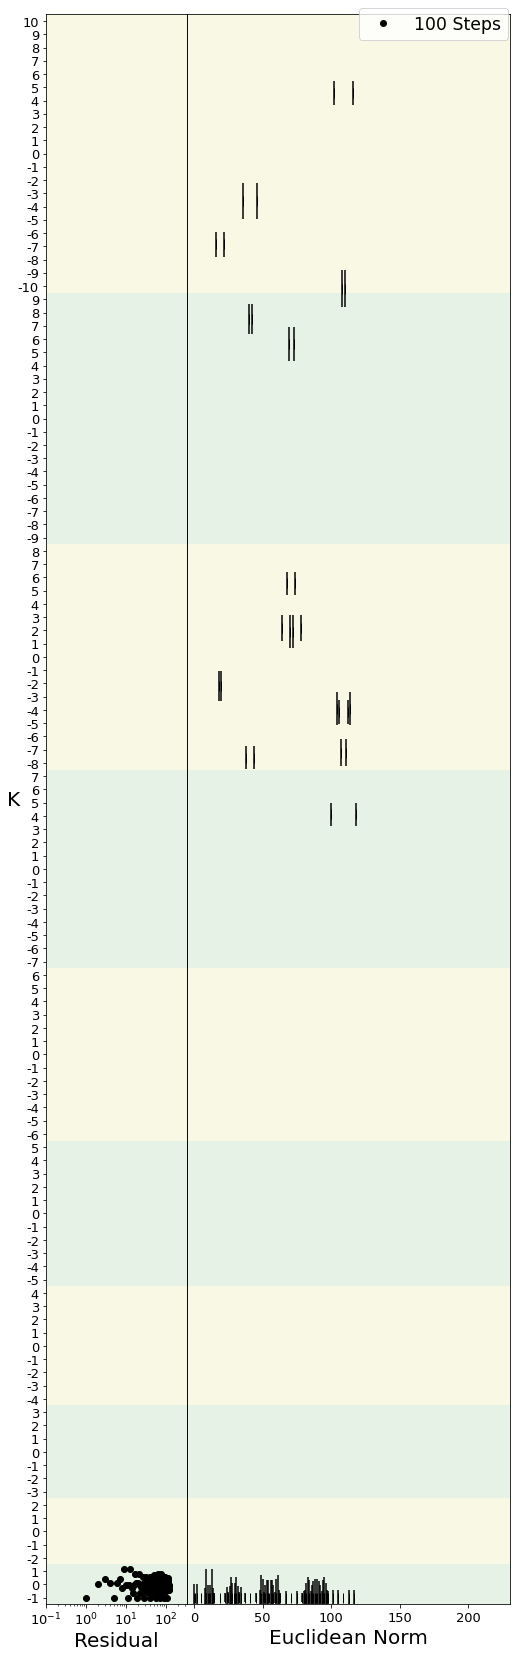

In [85]:
fig = plt.figure(figsize=(7, 23))
ax = []
ax.append(fig.add_axes((0.35, 0.03, 0.64, 0.96)))
ax.append(fig.add_axes((0.07, 0.03, 0.28, 0.96)))
max_norm = 0

for ism, sm in enumerate(sims):
    labels = []
    norm = []
    err = []
    for lmk in mol_mod_raw_num[sm].keys():
        prev_norm_size = len(norm)
        if lmk[0] == 0:
            continue
        labels.append(str(lmk[-1]))
        norm.append(compare[sm][lmk][3])
        err.append(compare[sm][lmk][1])
    if ism == len(sims) - 1:
        ax[0].errorbar(np.arange(len(norm)), norm, yerr=err,
              fmt='|', markersize=10, color='k', ecolor='k')
    ax[1].plot(np.arange(len(norm)), err, 'o', color=colors[ism], label=leg_labels[ism])
    max_norm = np.amax(norm+[max_norm])
    

yL0, yH0 = -5, 230
yL1, yH1 = 1e-1, max_norm*1.05

ax[0].set_ylim(-0.5, len(norm)-0.5)
ax[1].set_ylim(-0.5, len(norm)-0.5)
ax[1].set_ylabel("K", rotation=0, fontsize=label_size)
ax[0].set_xlim(yL0, yH0)
ax[1].set_xlim(yL1, yH1)
ax[0].set_xlabel("Euclidean Norm", fontsize=label_size)
ax[1].set_xlabel("Residual", fontsize=label_size)
ax[1].set_xscale('log')


ax[1].set_yticks(np.arange(len(norm)))
ax[1].set_yticklabels(labels, fontsize=tick_size)
ax[0].tick_params(axis='x', labelsize=tick_size)
ax[1].tick_params(axis='x', labelsize=tick_size)


start = 0
for l in np.arange(L_max+1):
    if l == 0:
        continue
    
    if l%2 == 0:
        clr = 'y'
    else:
        clr = 'g'
    rect = plt.Rectangle((yL0, start-0.5), yH0-yL0, 2*l+1, facecolor=clr, alpha=0.1)
    ax[0].add_patch(rect)
    rect = plt.Rectangle((yL1, start-0.5), yH1-yL1, 2*l+1, facecolor=clr, alpha=0.1)
    ax[1].add_patch(rect)
    start += 2*l + 1
plt.tight_layout()
fig.legend(loc='upper right', fontsize='xx-large')
fig.savefig("plots/norm_res_imag.png")

In [106]:
for l in range(L_max+1):
    outp = ""
    for m in range(-1*(L_max+1), L_max+1):
        if np.abs(m) > l:
            outp += " &"
        else:
            outp += " "+str(np.round(100*compare[sims[-1]][(l,0,m)][2])/100)+" +/- "+str(np.round(100*compare[sims[-1]][(l,0,m)][0])/100)+" &"
    print(outp)

 & & & & & & & & & & & 882.34 +/- 2.47 & & & & & & & & & & &
 & & & & & & & & & & 0.0 +/- 0.99 & 0.0 +/- 4.01 & 0.0 +/- 0.99 & & & & & & & & & &
 & & & & & & & & & 0.0 +/- 0.24 & 153.06 +/- 1.04 & 198.28 +/- 1.98 & 153.06 +/- 1.04 & 0.0 +/- 0.24 & & & & & & & & &
 & & & & & & & & 0.0 +/- 0.73 & 0.0 +/- 0.25 & 0.0 +/- 0.89 & 0.0 +/- 2.12 & 0.0 +/- 0.89 & 0.0 +/- 0.25 & 0.0 +/- 0.73 & & & & & & & &
 & & & & & & & 222.73 +/- 1.06 & 102.16 +/- 1.01 & 0.0 +/- 0.18 & 68.84 +/- 1.07 & 248.13 +/- 2.1 & 68.84 +/- 1.07 & 0.0 +/- 0.18 & 102.16 +/- 1.01 & 222.73 +/- 1.06 & & & & & & &
 & & & & & & 0.0 +/- 0.75 & 0.0 +/- 1.69 & 0.0 +/- 0.95 & 0.0 +/- 0.3 & 0.0 +/- 1.07 & 0.0 +/- 1.79 & 0.0 +/- 1.07 & 0.0 +/- 0.3 & 0.0 +/- 0.95 & 0.0 +/- 1.69 & 0.0 +/- 0.75 & & & & & &
 & & & & & 0.0 +/- 0.39 & 105.42 +/- 1.21 & 150.34 +/- 1.6 & 63.39 +/- 0.93 & 0.0 +/- 0.28 & 96.5 +/- 1.05 & 106.77 +/- 1.97 & 96.5 +/- 1.05 & 0.0 +/- 0.28 & 63.39 +/- 0.93 & 150.34 +/- 1.6 & 105.42 +/- 1.21 & 0.0 +/- 0.39 & & & & &
 

In [107]:
L = 8
for m in range(-1*L, L+1):
    outp = str(m) + " "
    for l in range(L+1):
        if np.abs(m) > l:
            outp += "& "
        else:
            outp += "& $"+str(np.round(100*compare[sims[-1]][(l,0,m)][2])/100)+" \pm "+str(np.round(100*compare[sims[-1]][(l,0,m)][0])/100)+"$ "
    print(outp + "\\\\")

-8 & & & & & & & & & $170.12 \pm 0.75$ \\
-7 & & & & & & & & $0.0 \pm 0.63$ & $73.19 \pm 1.11$ \\
-6 & & & & & & & $0.0 \pm 0.39$ & $0.0 \pm 0.64$ & $0.0 \pm 0.62$ \\
-5 & & & & & & $0.0 \pm 0.75$ & $105.42 \pm 1.21$ & $0.0 \pm 1.24$ & $128.63 \pm 1.03$ \\
-4 & & & & & $222.73 \pm 1.06$ & $0.0 \pm 1.69$ & $150.34 \pm 1.6$ & $0.0 \pm 1.38$ & $98.93 \pm 1.33$ \\
-3 & & & & $0.0 \pm 0.73$ & $102.16 \pm 1.01$ & $0.0 \pm 0.95$ & $63.39 \pm 0.93$ & $0.0 \pm 1.04$ & $76.55 \pm 0.94$ \\
-2 & & & $0.0 \pm 0.24$ & $0.0 \pm 0.25$ & $0.0 \pm 0.18$ & $0.0 \pm 0.3$ & $0.0 \pm 0.28$ & $0.0 \pm 0.31$ & $0.0 \pm 0.38$ \\
-1 & & $0.0 \pm 0.99$ & $153.06 \pm 1.04$ & $0.0 \pm 0.89$ & $68.84 \pm 1.07$ & $0.0 \pm 1.07$ & $96.5 \pm 1.05$ & $0.0 \pm 1.26$ & $72.9 \pm 1.2$ \\
0 & $882.34 \pm 2.47$ & $0.0 \pm 4.01$ & $198.28 \pm 1.98$ & $0.0 \pm 2.12$ & $248.13 \pm 2.1$ & $0.0 \pm 1.79$ & $106.77 \pm 1.97$ & $0.0 \pm 1.73$ & $152.39 \pm 1.7$ \\
1 & & $0.0 \pm 0.99$ & $153.06 \pm 1.04$ & $0.0 \pm 0.89$ & $68.84 

In [108]:
L = 8
for m in range(-1*L, L+1):
    outp = str(m) + " "
    for l in range(L+1):
        if np.abs(m) > l:
            outp += "& "
        else:
            outp += "& $"+str(np.round(100*compare[sims[-1]][(l,0,m)][3])/100)+" \pm "+str(np.round(100*compare[sims[-1]][(l,0,m)][1])/100)+"$ "
    print(outp + "\\\\")

-8 & & & & & & & & & $0.0 \pm 0.31$ \\
-7 & & & & & & & & $0.0 \pm 0.56$ & $73.19 \pm 0.99$ \\
-6 & & & & & & & $185.75 \pm 1.0$ & $0.0 \pm 1.69$ & $154.6 \pm 1.77$ \\
-5 & & & & & & $0.0 \pm 0.83$ & $105.42 \pm 1.35$ & $0.0 \pm 1.41$ & $128.63 \pm 1.22$ \\
-4 & & & & & $0.0 \pm 0.31$ & $0.0 \pm 0.42$ & $0.0 \pm 0.34$ & $0.0 \pm 0.43$ & $0.0 \pm 0.51$ \\
-3 & & & & $0.0 \pm 0.69$ & $102.16 \pm 0.94$ & $0.0 \pm 0.87$ & $63.39 \pm 0.85$ & $0.0 \pm 0.96$ & $76.55 \pm 0.85$ \\
-2 & & & $320.17 \pm 1.41$ & $0.0 \pm 2.17$ & $187.51 \pm 1.75$ & $0.0 \pm 1.58$ & $123.42 \pm 1.54$ & $0.0 \pm 1.36$ & $94.63 \pm 1.31$ \\
-1 & & $0.0 \pm 1.01$ & $153.06 \pm 1.08$ & $0.0 \pm 0.95$ & $68.84 \pm 1.13$ & $0.0 \pm 1.13$ & $96.5 \pm 1.1$ & $0.0 \pm 1.31$ & $72.9 \pm 1.26$ \\
0 & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ & $0.0 \pm 0.0$ \\
1 & & $0.0 \pm 1.01$ & $153.06 \pm 1.08$ & $0.0 \pm 0.95$ & $68.84 \pm 1.13$ & $0.0

In [63]:
cnt = 0
for l in np.arange(11):
    cnt += 1+l
print(cnt)

66


# Time Dependence Illustration

search axis_dist/A/temp-100K/*.npy
22 2 2
86 8 6
64 6 4
80 8 0
84 8 4
60 6 0
66 6 6
88 8 8
42 4 2
82 8 2
40 4 0
44 4 4
20 2 0
62 6 2


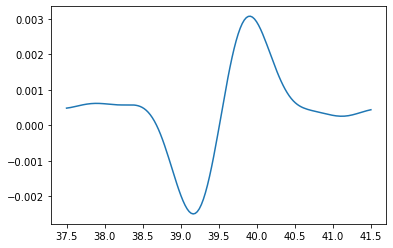

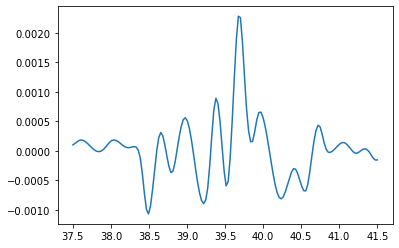

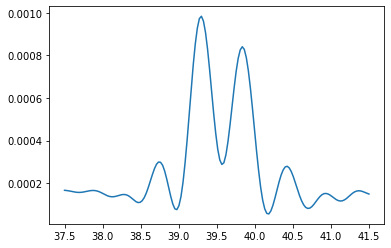

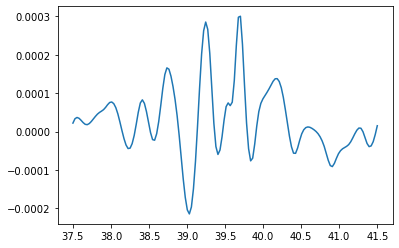

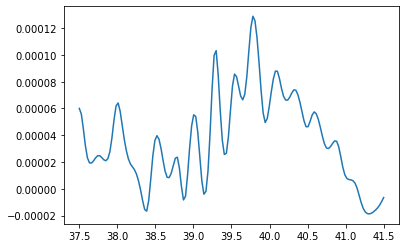

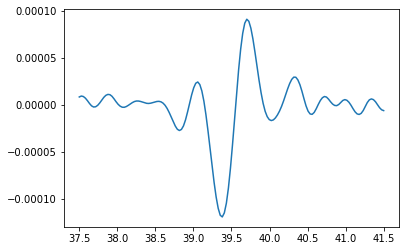

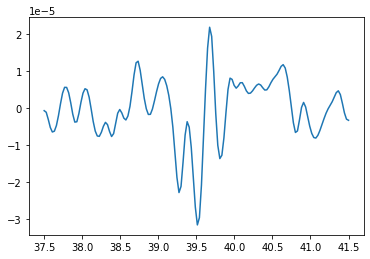

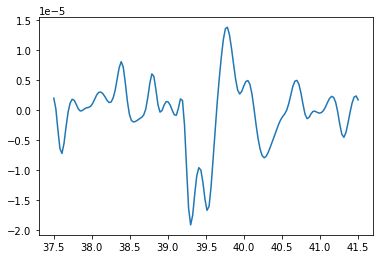

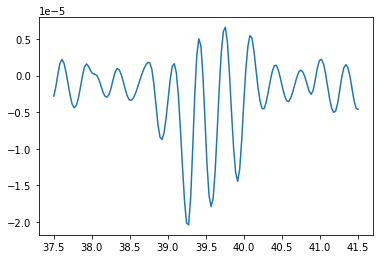

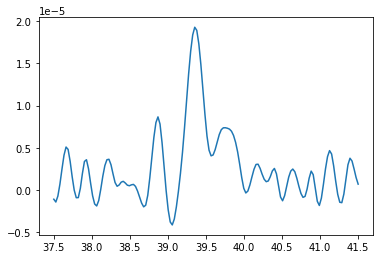

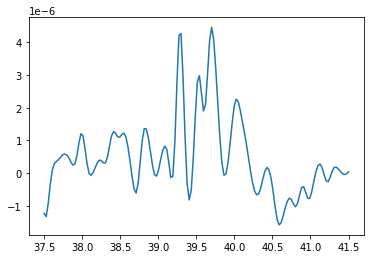

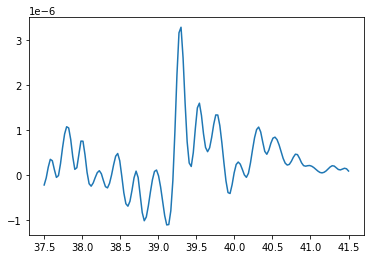

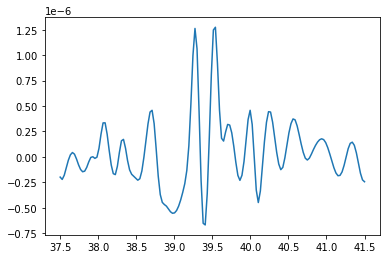

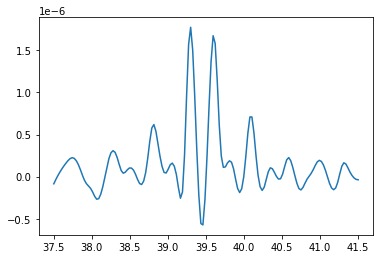

In [46]:
sys.path.append("..")
from diffraction import get_wignerD_3d
import subprocess

bases, norms = {}, {}
LMK = []

L_list = []
M_dict = defaultdict(list)
files = "{}/*.npy".format("axis_dist/A/temp-100K")
print("search", files)
for fl in glob.glob(files):

    D = fl[fl.find(" D")+2:-4]
    ln = len(D) + len(D)%2
    L = int(D[:ln//2])
    M = int(D[ln//2:])
    print(D,L,M)
    if L not in L_list:
        L_list.append(L)
    M_dict[L].append(M)
    with open(fl, "rb") as file:
        bases[(L,M)] = np.load(file)
    if M != 0:
        bases[(L,M)] *= 2
basisList = []
normsList = []
L_list.sort()
for l in L_list:
    for m in np.sort(M_dict[l]):
        basisList.append(np.expand_dims(bases[(l,m)], axis=0))
        LMK.append(np.array([l,0,m]))

fName = "./axis_dist/times/temp_100K.npy"
with open(fName, "rb") as file:
    times = np.load(file)
bases = np.concatenate(basisList, axis=0)


# Create evenly spaced values
if bases.shape[-1] > 1:
    bases_interp = interp1d(times, bases, axis=-1, kind='cubic')
    times = np.linspace(times[0], times[-1], 1000)
    bases = bases_interp(times)


    """
    inds = np.arange(len(times))# < 100
    for i, (L, M, K) in enumerate(LMK):
        fig, ax = plt.subplots()
        ax.plot(times[inds], bases[i,inds])
        #plt.savefig(os.path.join("./plots", "basis_input_{}-{}-{}.png".format(
        #    L, M, K)))
        #plt.close()
    """

    """
    if params.probe_FWHM is not None:
        print("INTERPING")
        delta_time = times[1] - times[0]
        bases = gaussian_filter1d(
            bases, (0.001*params.probe_FWHM/2.355)/delta_time, axis=-1)
    """

# Select evaluation times
bases_interp = interp1d(times, bases, axis=-1, kind='cubic')
times = np.linspace(37.5, 41.5, 150)
bases = bases_interp(times)
for i, (L, M, K) in enumerate(LMK):
    fig, ax = plt.subplots()
    ax.plot(times, bases[i])

In [47]:
N = 150
phi = np.linspace(0, 2*np.pi, N+1)[:-1] + 2*np.pi/(2*N)
theta = np.linspace(0, np.pi, N+1)[:-1] + np.pi/(2*N)
chi = np.linspace(0, 2*np.pi, N+1)[:-1] + 2*np.pi/(2*N)
angles = np.zeros((N,N,N,3))
for i in range(N):
    angles[i,:,:,0]  = phi[i]
    for k in range(N):
        angles[:,k,:,1] = theta[k]
        angles[i,k,:,2]  = chi

angles = np.reshape(angles, (N**3, 3))


wigD_eval = []
for (l,m,k) in LMK:
    print(l,m,k)
    #if l > 2:
    #    break
    wigD_eval.append((2*l + 1)/(8*np.pi**2)*get_wignerD_3d(angles[:,0], angles[:,1], angles[:,2], l, [m], k))
    
wigD_eval = np.reshape(np.array(wigD_eval), (len(wigD_eval), N, N, N))


2 0 0
2 0 2
4 0 0
4 0 2
4 0 4
6 0 0
6 0 2
6 0 4
6 0 6
8 0 0
8 0 2
8 0 4
8 0 6
8 0 8


In [6]:
print(wigD_eval.shape)
jac_th = np.expand_dims(np.ones((1,1,len(theta)))*np.sin(theta), -1)
dphi, dtheta, dchi = 2*np.pi/N, np.pi/N, 2*np.pi/N
print(np.sum(np.sum(np.sum(wigD_eval*jac_th*dphi*dtheta*dchi, -1), -1), -1))

(14, 50, 50, 50)
[ 8.23419032e-04+0.00000000e+00j  4.66056137e-10-4.79557960e-19j
  1.48574145e-03+0.00000000e+00j -8.35247071e-09+6.47946083e-18j
 -4.67232974e-09+4.56813727e-18j  2.15427351e-03+0.00000000e+00j
 -2.01562252e-10-6.42555968e-18j  5.22254246e-09+2.85106446e-18j
  2.19420873e-09+1.74906657e-17j  2.83179676e-03+0.00000000e+00j
  6.17959858e-09-1.05668187e-18j -1.01135894e-10+7.33014307e-18j
  4.30553056e-09+6.48661239e-18j  1.01137249e-08+8.08068845e-18j]


In [9]:
print(wigD_eval.shape)
jac_th = np.expand_dims(np.ones((1,1,len(theta)))*np.sin(theta), -1)
dphi, dtheta, dchi = 2*np.pi/N, np.pi/N, 2*np.pi/N
print(np.sum(np.sum(np.sum(wigD_eval*jac_th*dphi*dtheta*dchi, -1), -1), -1))

(14, 150, 150, 150)
[ 9.13858251e-05+0.00000000e+00j  1.04832353e-09-4.02024056e-17j
  1.64568859e-04+0.00000000e+00j -8.87460629e-11-8.01786943e-18j
 -1.68780614e-09+7.31575041e-17j  2.37787487e-04+0.00000000e+00j
  3.54224360e-09-1.61692458e-17j -1.58897822e-09+4.61835303e-17j
  6.84982506e-10-2.48487595e-16j  3.11144342e-04+0.00000000e+00j
  1.39796634e-10-3.79089637e-18j  2.69014132e-11+3.05964762e-17j
  1.58324010e-09-1.51029364e-16j  4.18043933e-09+1.83405848e-16j]


In [56]:
jac_th = np.expand_dims(np.ones((1,1,len(theta)))*np.sin(theta), -1)
dphi, dtheta, dchi = 2*np.pi/N, np.pi/N, 2*np.pi/N
print("SHAPES",wigD_eval.shape, jac_th.shape, np.reshape(theta, (1,1,-1,1,1)).shape)
exp_phi = np.sum(np.sum(wigD_eval*jac_th*dtheta*dchi, 3), 2)
exp_theta = np.sum(np.sum(wigD_eval*dphi*dchi, 3), 1)
exp_chi = np.sum(np.sum(wigD_eval*jac_th*dtheta*dphi, 2), 1)

print(exp_theta.shape)
exp_phi = np.expand_dims(exp_phi, -1)*np.expand_dims(bases, 1)
exp_theta = np.expand_dims(exp_theta, -1)*np.expand_dims(bases, 1)
exp_chi = np.expand_dims(exp_chi, -1)*np.expand_dims(bases, 1)

print(exp_theta.shape)
# Sum over bases and add in D000
iso_val = np.array([(2*2*np.pi)/(8*np.pi**2), (2*2*np.pi)/(8*np.pi**2), (2*np.pi)**2/(8*np.pi**2)])
exp_phi = np.sum(exp_phi, 0) + iso_val[0]
exp_chi = np.sum(exp_chi, 0) + iso_val[1]
exp_theta = np.sum(exp_theta, 0) + iso_val[2]#*np.expand_dims(jac_th[0,0,:,0], -1)

print(exp_chi.shape)
angles = np.array([phi, chi, theta])
exp_angles = np.array([exp_phi, exp_chi, exp_theta])

SHAPES (14, 150, 150, 150) (1, 1, 150, 1) (1, 1, 150, 1, 1)
(14, 150)
(14, 150, 150)
(150, 150)


In [29]:
print(bases.shape, np.array(LMK).shape)
np.sum(bases*8*np.pi**2/(2*np.expand_dims(np.array(LMK)[:,0], -1)+1), 0)

(14, 50) (14, 3)


array([ 1.14129514e-02,  1.28399956e-02,  1.28560661e-02,  1.20345643e-02,
        1.15311279e-02,  1.25147549e-02,  1.46585312e-02,  1.42196782e-02,
        1.19044534e-02,  1.08366373e-02,  1.14404627e-02,  7.02887830e-03,
       -7.00950075e-03, -6.20092383e-05,  9.63902474e-03,  7.66055165e-04,
       -1.30204322e-02, -1.56188599e-02, -1.95971710e-02, -3.09819300e-02,
       -4.24145927e-02, -4.31995158e-02, -2.71036317e-02, -2.39908069e-03,
       -3.69919197e-03,  1.74612981e-03,  4.68066494e-02,  7.87178929e-02,
        6.24254695e-02,  5.85209553e-02,  6.47684782e-02,  5.45282521e-02,
        3.66168209e-02,  2.08156917e-02,  1.39047129e-02,  1.32375116e-02,
        9.71800375e-03,  1.69492834e-03,  2.49409627e-03,  1.25624956e-02,
        1.24617876e-02,  6.15672904e-03,  5.97231292e-03,  7.05528507e-03,
        6.60604215e-03,  4.81883146e-03,  5.33008600e-03,  7.09211323e-03,
        6.08881608e-03,  5.76470147e-03])

output/NO2_sim_diffraction-analytic_Qmax-15_time-39.25.h5
output/NO2_sim_diffraction-analytic_Qmax-15_time-39.68.h5
output/NO2_sim_diffraction-analytic_Qmax-15_time-39.85.h5
7.964460506479365e-05 [0.15907534 0.15923459] 0.15915494309189535
0.0008974232523877301 [0.1583175  0.16005237] 0.15915494309189535
0.011783839717709799 [0.49515684 0.51178384] 0.5
done


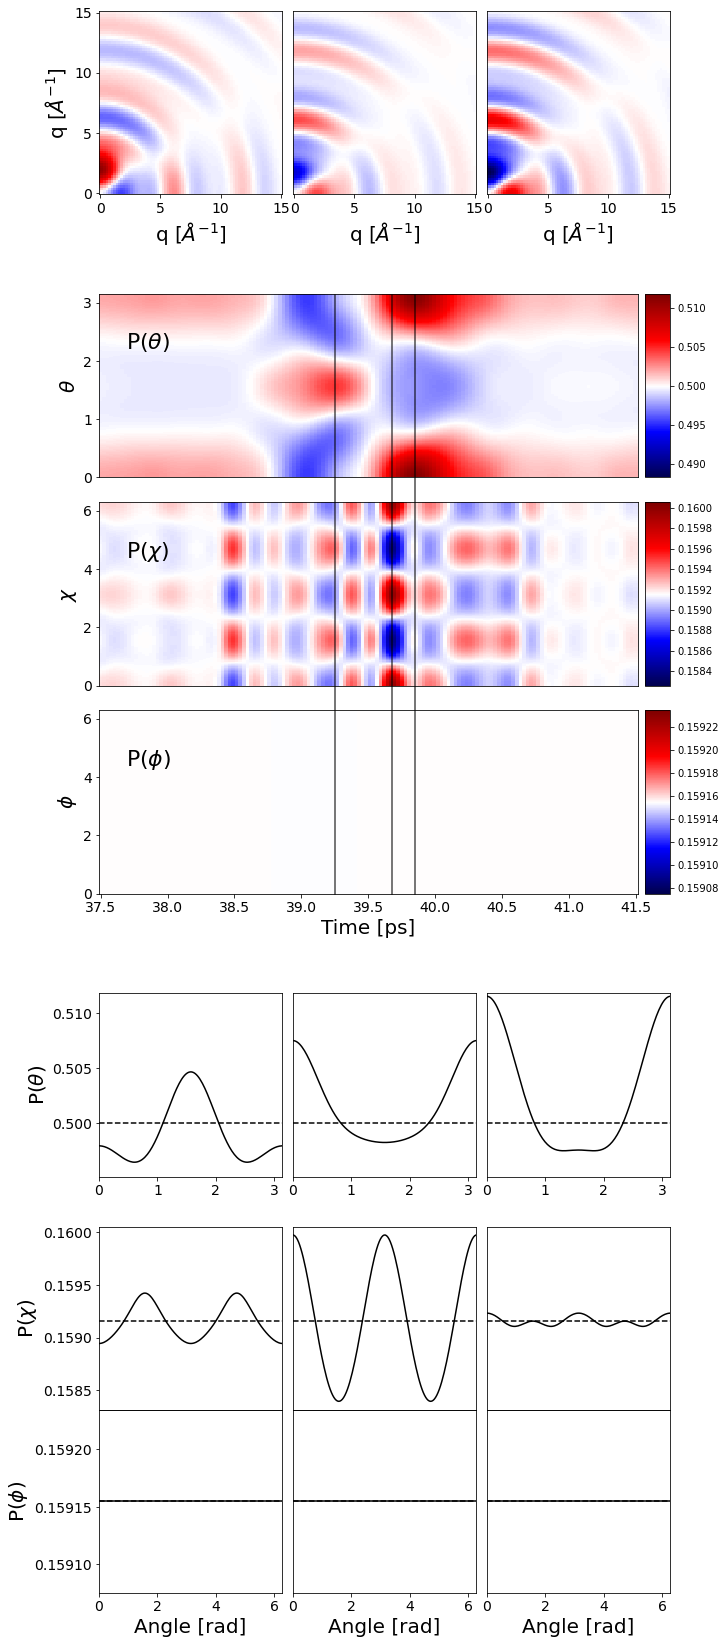

In [60]:
axs = []
eval_times = [39.05, 39.25, 39.68, 39.85, 40.05]
eval_times = [39.25, 39.68, 39.85]
dfrctn = []
label_size = 20
tick_size = 14


for tm in eval_times:
    fName = os.path.join("output", "NO2_sim_diffraction-analytic_Qmax-15_time-{0:.6g}.h5".format(float(tm)))
    print(fName)
    if not os.path.exists(fName):
        #p = subprocess.run(["python3", "../diffraction.py", "--molecule", "NO2", "--calculation_type", "analytic",
        #                "--xyz_file", "NO2.xyz", "--basis_folder", 
        #                "/cds/group/ued/scratch/N2O/axis_distributions/NO2/A/temp-100K",
        #                "--eval_time", str(tm)], check=True, stdout=subprocess.PIPE)
        pp = subprocess.run("python ../diffraction.py --molecule NO2 --calculation_type analytic --xyz_file NO2.xyz --basis_folder /cds/group/ued/scratch/N2O/axis_distributions/NO2/A/temp-100K --eval_time {}".format(tm),
                        shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(pp.stdout)
        print(pp.stderr)
        #p.wait()
        #os.system("python3 ../diffraction.py --molecule NO2 --calculation_type analytic --xyz_file NO2.xyz --basis_folder /cds/group/ued/scratch/N2O/axis_distributions/NO2/A/temp-100K --eval_time {}".format(tm))
        print("python3 ../diffraction.py --molecule NO2 --calculation_type analytic --xyz_file NO2.xyz --basis_folder /cds/group/ued/scratch/N2O/axis_distributions/NO2/A/temp-100K --eval_time {}".format(tm))
        if not os.path.exists(fName):
            print("FAILED TO MAKE " + fName)
            sys.exit(0)
    
    with h5py.File(fName, "r") as h5:
        dfrctn.append(h5["mod_diffraction"][:])
        q = h5["q"][:]
dfrctn = np.array(dfrctn)
sz = q.shape[-1]//2
q = q[sz:,sz:]
dfrctn = dfrctn[:,sz:,sz:]
dfrctn /= np.max([np.abs(np.amin(dfrctn)), np.amax(dfrctn)])
    #h5.close()



top_pad = 0.06
bot_pad = 0.035
vert_pad = 0.015
vert_dim = (1 - (bot_pad + top_pad + 9*vert_pad))/7

horz_pad = 0.015
left_pad = 0.127
right_pad = 0.08
cbar_pad = 0.01
cbar_sz = 0.035
horz_dim = (1 - (left_pad + right_pad + 2*horz_pad))/3

fig_ratio = vert_dim/horz_dim
fig = plt.figure(figsize=(10,10/fig_ratio))


vert_anch = []
extra_v = 0
for v in range(7):
    if v == 3 or v == 6:
        extra_v += 3
    if v == 0:
        vert_anch.append(bot_pad)
    elif v == 1:
        vert_anch.append(bot_pad + v*(vert_dim) + extra_v*vert_pad)
    else:
        vert_anch.append(bot_pad + v*(vert_pad + vert_dim) + extra_v*vert_pad)
            
horz_anch = []
for h in range(len(eval_times)):
    horz_anch.append(left_pad + (horz_dim + horz_pad)*h)

caxs = []
rr = 0
for v in range(7):
    if v >= 3 and v <=5:
        axs.append(fig.add_axes((left_pad, vert_anch[v], 1-(left_pad+right_pad+cbar_pad+cbar_sz), vert_dim)))
        caxs.append(fig.add_axes((1-(right_pad+cbar_sz), vert_anch[v], cbar_sz, vert_dim)))
        continue
    else:
        axs.append([])
        for h in range(len(eval_times)):
            axs[v].append(fig.add_axes((horz_anch[h], vert_anch[v], horz_dim, vert_dim)))
        #caxs.append(fig.add_axes((horz_anch[cc]+horz_dim+0.1*right_pad, vert_anch[rr], right_pad*0.2, vert_dim)))
        #rr += 1

###  Filling Plots  ###
tInds = []
for t in eval_times:
    tInds.append(np.argmin(np.abs(times-t)))

lines = []
exp_labels = ['\phi', '\chi', '\\theta']
X_tm,Y_tm = np.meshgrid(np.append(times-(times[1]-times[0])/2, [times[-1]+(times[1]-times[0])/2]), np.linspace(0, 2*np.pi, N+1))
rng = []
for i in range(len(angles)):
    rng.append([])
    if v == 0:
        rng[-1].append(1./(2*np.pi) - 0.001)
        rng[-1].append(1./(2*np.pi) + 0.001)
    else:
        rng[-1].append(np.amin(np.real(exp_angles[i,:,:]))*0.9995)
        rng[-1].append(np.amax(np.real(exp_angles[i,:,:]))*1.0005)
rng = np.array(rng)
for v in range(7):
    if v < 3:
        hrz_ln = 1./(2*np.pi)
        if v == 2:
            hrz_ln = 0.5
        axs[v][0].set_ylabel(r'P$\left( {} \right)$'.format(exp_labels[v]), fontsize=label_size)
        for h, itm in enumerate(tInds):
            axs[v][h].plot(angles[v], np.real(exp_angles[v,:,itm]), '-k')
            axs[v][h].set_ylim(rng[v])
            axs[v][h].set_xlim([0, angles[v][-1]])
            axs[v][h].axhline(hrz_ln, color='k', linestyle='--')
            axs[v][h].tick_params(axis='y', labelsize=tick_size)
            axs[v][h].tick_params(axis='x', labelsize=tick_size)
            if h > 0:
                axs[v][h].yaxis.set_visible(False)
            if v == 1:
                axs[v][h].xaxis.set_visible(False)
            if v == 0:
                axs[v][h].set_xlabel("Angle [rad]", fontsize=label_size)
    elif v < 6:
        rng_max = np.amax(np.real(exp_angles[v-3,:,:]))*1.0005
        rng_min = np.amin(np.real(exp_angles[v-3,:,:]))*0.9995
        
        if v == 0:
            rng_max = hrz_ln + 0.001
            rng_min = hrz_ln - 0.001
        if v == 5:
            Y_tm_ = Y_tm/2
        else:
            Y_tm_ = Y_tm
        drng = np.amax(np.abs(rng[v-3]-iso_val[v-3]))
        print(drng, rng[v-3], iso_val[v-3])
        pcm = axs[v].pcolormesh(X_tm, Y_tm_, np.real(exp_angles[int(v-3),:,:]),
                    cmap='seismic', vmin=iso_val[v-3]-drng, vmax=iso_val[v-3]+drng)
        fig.colorbar(pcm, cax=caxs[v-3])
        if v > 3:
            axs[v].xaxis.set_visible(False)
        else:
            axs[v].set_xlabel("Time [ps]", fontsize=label_size)
            for tm in eval_times:
                """
                transFigure = fig.transFigure.inverted()
                coord1 = transFigure.transform(axs[v].transData.transform([tm,1]))
                coord2 = transFigure.transform(axs[v].transData.transform([tm,5]))


                fig.lines.append(matplotlib.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]),
                               transform=fig.transFigure))
                """
                #axs[v].add_line(matplotlib.lines.Line2D((tm,tm), (-0.05,15)))
                #axs[v].axvline(tm, -0.5, 1, color='k')
                lines.append(matplotlib.lines.Line2D([tm, tm], [0, 20.53], transform=axs[v].transData, figure=fig,
                        color='k', alpha=0.7))
                
        axs[v].set_ylabel(r'${}$'.format(exp_labels[v-3]), fontsize=label_size)
        axs[v].tick_params(axis='y', labelsize=tick_size)
        axs[v].tick_params(axis='x', labelsize=tick_size)
        axs[v].text(0.05, 0.7, r'P$\left( {} \right)$'.format(exp_labels[v-3]),
                    fontsize=22, transform=axs[v].transAxes)
    else:
        q_ = np.append(q[:,0]-(q[1,0]-q[0,0])/2, np.array([q[-1,0]+(q[1,0]-q[0,0])/2]))
        X,Y = np.meshgrid(q_, q_)
        for h, itm in enumerate(tInds):
            axs[v][h].pcolormesh(X, Y, dfrctn[h], vmin=-1, vmax=1, cmap='seismic')
            if h == 0:
                axs[v][h].set_ylabel(r'q [$\AA^{-1}$]', fontsize=label_size)
                axs[v][h].set_xlabel(r'q [$\AA^{-1}$]', fontsize=label_size)
            else:
                axs[v][h].yaxis.set_visible(False)
                axs[v][h].set_xlabel(r'q [$\AA^{-1}$]', fontsize=label_size)
            axs[v][h].tick_params(axis='y', labelsize=tick_size)
            axs[v][h].tick_params(axis='x', labelsize=tick_size)
                                     
        print("done")
fig.lines.extend(lines)
"""
for v in len(axs):
    if v >= 3 and v <= 5:
        axs[v].
    else:
        for h in len(axs[v])
"""
fig.savefig("./plots/alignment.png")       

In [10]:
1/(2*np.pi)

0.15915494309189535

In [11]:
1/(8*np.pi**2)

0.012665147955292222